In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *
noise_std = 0.1
n  = 3000
p =50  
y = np.random.uniform(-.5, 2.5, n )
X = y.reshape(-1, 1)  # Reshape y into a 2D array (n_samples, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = np.random.normal(1, scale=0.5)
    else:
        xtrue[i] = np.random.normal(-1, scale=0.5)

obs_noise_std = np.random.uniform(0.5,  1.5, len(xtrue))  # Varying noise levels
# Generate x (noisy observations)


v = np.random.rand(p)
rank_1_matrix = np.outer(xtrue, v)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "emdn",
               X_l= X)

In [4]:
mycebmf.init_LF()

The array does not contain any missing values.


In [5]:
for i in range(10):
    mycebmf.iter()

Epoch 10/200, Loss: 2.6904
Epoch 20/200, Loss: 2.4503
Epoch 30/200, Loss: 2.2133
Epoch 40/200, Loss: 2.1460
Epoch 50/200, Loss: 2.1195
Epoch 60/200, Loss: 2.1062
Epoch 70/200, Loss: 2.0946
Epoch 80/200, Loss: 2.0967
Epoch 90/200, Loss: 2.0938
Epoch 100/200, Loss: 2.0876
Epoch 110/200, Loss: 2.0815
Epoch 120/200, Loss: 2.0779
Epoch 130/200, Loss: 2.0787
Epoch 140/200, Loss: 2.0760
Epoch 150/200, Loss: 2.0768
Epoch 160/200, Loss: 2.0720
Epoch 170/200, Loss: 2.0667
Epoch 180/200, Loss: 2.0654
Epoch 190/200, Loss: 2.0694
Epoch 200/200, Loss: 2.0670
Epoch 10/200, Loss: -0.7477
Epoch 20/200, Loss: -0.7620
Epoch 30/200, Loss: -0.7505
Epoch 40/200, Loss: -0.7534
Epoch 50/200, Loss: -0.7505
Epoch 60/200, Loss: -0.7618
Epoch 70/200, Loss: -0.7599
Epoch 80/200, Loss: -0.7552
Epoch 90/200, Loss: -0.7654
Epoch 100/200, Loss: -0.7670
Epoch 110/200, Loss: -0.7658
Epoch 120/200, Loss: -0.7677
Epoch 130/200, Loss: -0.7674
Epoch 140/200, Loss: -0.7677
Epoch 150/200, Loss: -0.7682
Epoch 160/200, Loss: -0

KeyboardInterrupt: 

In [9]:
mycebmfbasic= cEBMF(data= noisy_matrix )
mycebmf.init_LF()

The array does not contain any missing values.


In [11]:
mycebmf.iter()

Epoch 10/200, Loss: 2.7094
Epoch 20/200, Loss: 2.5488
Epoch 30/200, Loss: 2.2093
Epoch 40/200, Loss: 2.1367
Epoch 50/200, Loss: 2.1209
Epoch 60/200, Loss: 2.1006
Epoch 70/200, Loss: 2.0921
Epoch 80/200, Loss: 2.0952
Epoch 90/200, Loss: 2.0853
Epoch 100/200, Loss: 2.0877
Epoch 110/200, Loss: 2.0834
Epoch 120/200, Loss: 2.0757
Epoch 130/200, Loss: 2.0723
Epoch 140/200, Loss: 2.0708
Epoch 150/200, Loss: 2.0670
Epoch 160/200, Loss: 2.0667
Epoch 170/200, Loss: 2.0641
Epoch 180/200, Loss: 2.0666
Epoch 190/200, Loss: 2.0618
Epoch 200/200, Loss: 2.0612
Epoch 10/200, Loss: -0.7445
Epoch 20/200, Loss: -0.7546
Epoch 30/200, Loss: -0.7622
Epoch 40/200, Loss: -0.7671
Epoch 50/200, Loss: -0.7621
Epoch 60/200, Loss: -0.7583
Epoch 70/200, Loss: -0.7659
Epoch 80/200, Loss: -0.7636
Epoch 90/200, Loss: -0.7606
Epoch 100/200, Loss: -0.7652
Epoch 110/200, Loss: -0.7658
Epoch 120/200, Loss: -0.7578
Epoch 130/200, Loss: -0.7655
Epoch 140/200, Loss: -0.7624
Epoch 150/200, Loss: -0.7631
Epoch 160/200, Loss: -0

KeyboardInterrupt: 

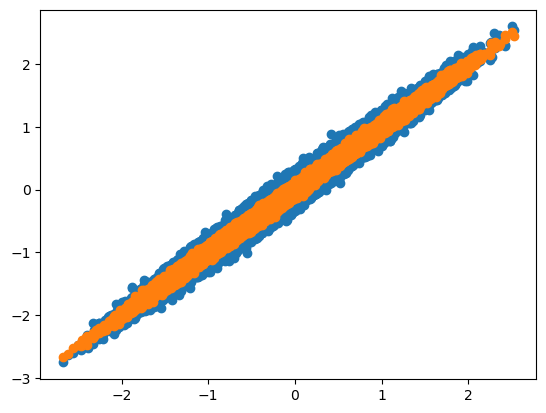

In [13]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

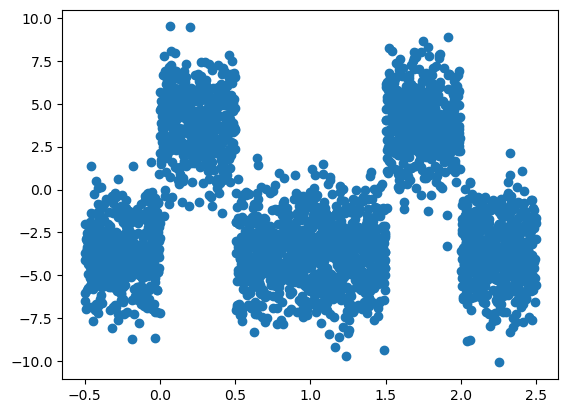

In [19]:
plt.scatter(y, mycebmf.L[:,0])